In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error


## Preparing Dataset

In [11]:
joint_data = pd.read_csv('joint_data.csv',index_col=0)
joint_data

,timestamp,shoulder_pan_joint_angle,shoulder_lift_joint_angle,elbow_joint_angle,wrist_1_joint_angle,wrist_2_joint_angle,wrist_3_joint_angle,shoulder_pan_joint_velocity,shoulder_lift_joint_velocity,elbow_joint_velocity,wrist_1_joint_velocity,wrist_2_joint_velocity,wrist_3_joint_velocity
#,,,,,,,,,,,,,
1,2024-10-27T10:39:03.552844,7.882391e-02,0.458980,0.716153,0.781433,0.637329,0.322453,2.463247,14.343121,22.379766,24.419772,19.916519,10.076651
2,2024-10-27T10:39:03.885122,1.568519e-01,0.520626,0.744899,0.769576,0.588047,0.248950,2.438373,1.926438,0.898315,-0.370511,-1.540058,-2.296949
3,2024-10-27T10:39:04.211302,2.332959e-01,0.577015,0.766123,0.749949,0.532827,0.172934,2.388877,1.762148,0.663254,-0.613359,-1.725623,-2.375508
4,2024-10-27T10:39:04.540471,3.073842e-01,0.627577,0.779611,0.722748,0.472226,0.095172,2.315258,1.580065,0.421495,-0.850014,-1.893763,-2.430079
5,2024-10-27T10:39:04.873519,3.783685e-01,0.671802,0.785226,0.688250,0.406857,0.016448,2.218259,1.382026,0.175480,-1.078086,-2.042779,-2.460112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2024-10-27T10:43:07.355733,-3.073842e-01,0.095172,0.472226,0.722748,0.779611,0.627577,2.218259,2.460112,2.042779,1.078086,-0.175480,-1.382026
747,2024-10-27T10:43:07.687333,-2.332959e-01,0.172934,0.532827,0.749949,0.766123,0.577015,2.315258,2.430079,1.893763,0.850014,-0.421495,-1.580065
748,2024-10-27T10:43:08.020057,-1.568519e-01,0.248950,0.588047,0.769576,0.744899,0.520626,2.388877,2.375508,1.725623,0.613359,-0.663254,-1.762148


In [12]:
#convert the timestamp column to datetime
joint_data['timestamp'] = pd.to_datetime(joint_data['timestamp'])
joint_data

,timestamp,shoulder_pan_joint_angle,shoulder_lift_joint_angle,elbow_joint_angle,wrist_1_joint_angle,wrist_2_joint_angle,wrist_3_joint_angle,shoulder_pan_joint_velocity,shoulder_lift_joint_velocity,elbow_joint_velocity,wrist_1_joint_velocity,wrist_2_joint_velocity,wrist_3_joint_velocity
#,,,,,,,,,,,,,
1,2024-10-27 10:39:03.552844,7.882391e-02,0.458980,0.716153,0.781433,0.637329,0.322453,2.463247,14.343121,22.379766,24.419772,19.916519,10.076651
2,2024-10-27 10:39:03.885122,1.568519e-01,0.520626,0.744899,0.769576,0.588047,0.248950,2.438373,1.926438,0.898315,-0.370511,-1.540058,-2.296949
3,2024-10-27 10:39:04.211302,2.332959e-01,0.577015,0.766123,0.749949,0.532827,0.172934,2.388877,1.762148,0.663254,-0.613359,-1.725623,-2.375508
4,2024-10-27 10:39:04.540471,3.073842e-01,0.627577,0.779611,0.722748,0.472226,0.095172,2.315258,1.580065,0.421495,-0.850014,-1.893763,-2.430079
5,2024-10-27 10:39:04.873519,3.783685e-01,0.671802,0.785226,0.688250,0.406857,0.016448,2.218259,1.382026,0.175480,-1.078086,-2.042779,-2.460112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2024-10-27 10:43:07.355733,-3.073842e-01,0.095172,0.472226,0.722748,0.779611,0.627577,2.218259,2.460112,2.042779,1.078086,-0.175480,-1.382026
747,2024-10-27 10:43:07.687333,-2.332959e-01,0.172934,0.532827,0.749949,0.766123,0.577015,2.315258,2.430079,1.893763,0.850014,-0.421495,-1.580065
748,2024-10-27 10:43:08.020057,-1.568519e-01,0.248950,0.588047,0.769576,0.744899,0.520626,2.388877,2.375508,1.725623,0.613359,-0.663254,-1.762148


In [13]:
#split the timestamp column into date and time
joint_data['time'] = joint_data['timestamp'].dt.time
joint_data


,timestamp,shoulder_pan_joint_angle,shoulder_lift_joint_angle,elbow_joint_angle,wrist_1_joint_angle,wrist_2_joint_angle,wrist_3_joint_angle,shoulder_pan_joint_velocity,shoulder_lift_joint_velocity,elbow_joint_velocity,wrist_1_joint_velocity,wrist_2_joint_velocity,wrist_3_joint_velocity,time
#,,,,,,,,,,,,,,
1,2024-10-27 10:39:03.552844,7.882391e-02,0.458980,0.716153,0.781433,0.637329,0.322453,2.463247,14.343121,22.379766,24.419772,19.916519,10.076651,10:39:03.552844
2,2024-10-27 10:39:03.885122,1.568519e-01,0.520626,0.744899,0.769576,0.588047,0.248950,2.438373,1.926438,0.898315,-0.370511,-1.540058,-2.296949,10:39:03.885122
3,2024-10-27 10:39:04.211302,2.332959e-01,0.577015,0.766123,0.749949,0.532827,0.172934,2.388877,1.762148,0.663254,-0.613359,-1.725623,-2.375508,10:39:04.211302
4,2024-10-27 10:39:04.540471,3.073842e-01,0.627577,0.779611,0.722748,0.472226,0.095172,2.315258,1.580065,0.421495,-0.850014,-1.893763,-2.430079,10:39:04.540471
5,2024-10-27 10:39:04.873519,3.783685e-01,0.671802,0.785226,0.688250,0.406857,0.016448,2.218259,1.382026,0.175480,-1.078086,-2.042779,-2.460112,10:39:04.873519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2024-10-27 10:43:07.355733,-3.073842e-01,0.095172,0.472226,0.722748,0.779611,0.627577,2.218259,2.460112,2.042779,1.078086,-0.175480,-1.382026,10:43:07.355733
747,2024-10-27 10:43:07.687333,-2.332959e-01,0.172934,0.532827,0.749949,0.766123,0.577015,2.315258,2.430079,1.893763,0.850014,-0.421495,-1.580065,10:43:07.687333
748,2024-10-27 10:43:08.020057,-1.568519e-01,0.248950,0.588047,0.769576,0.744899,0.520626,2.388877,2.375508,1.725623,0.613359,-0.663254,-1.762148,10:43:08.020057


### checking for missing values

In [14]:
joint_data.isnull().sum()

timestamp                       0
shoulder_pan_joint_angle        0
shoulder_lift_joint_angle       0
elbow_joint_angle               0
wrist_1_joint_angle             0
wrist_2_joint_angle             0
wrist_3_joint_angle             0
shoulder_pan_joint_velocity     0
shoulder_lift_joint_velocity    0
elbow_joint_velocity            0
wrist_1_joint_velocity          0
wrist_2_joint_velocity          0
wrist_3_joint_velocity          0
time                            0
dtype: int64

## Static Visualization for all features

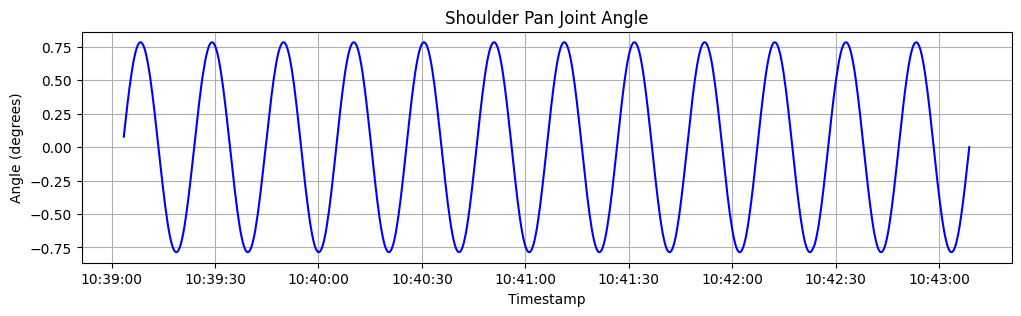

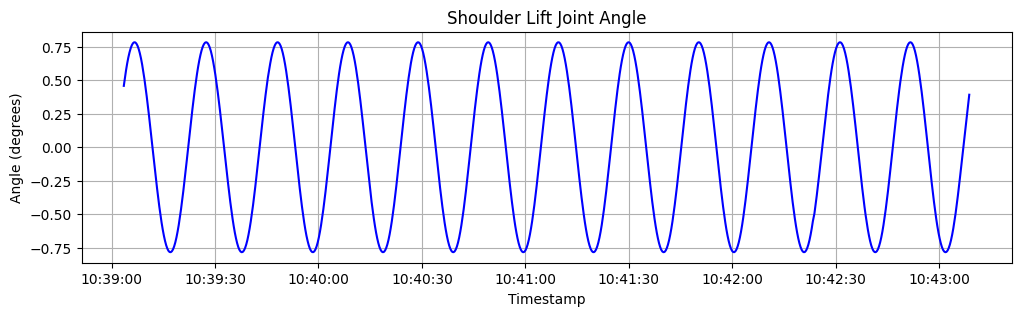

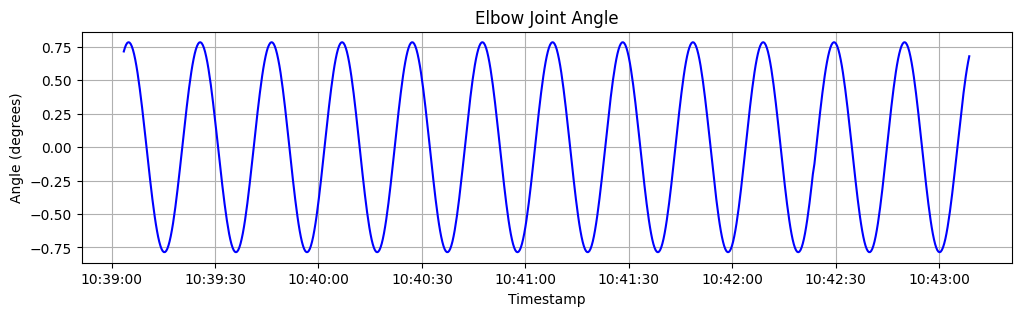

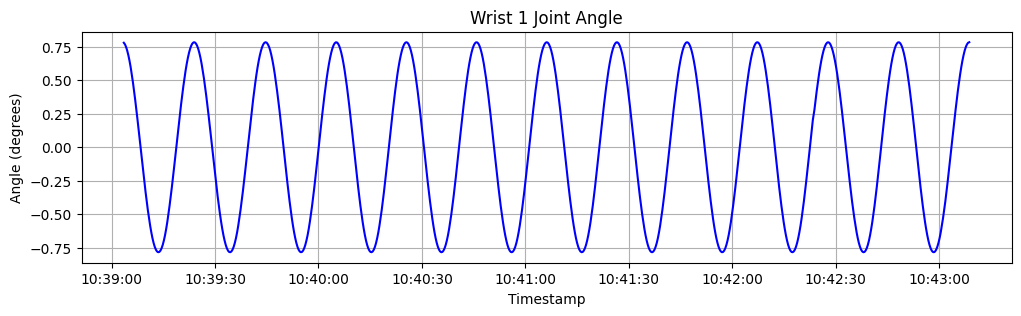

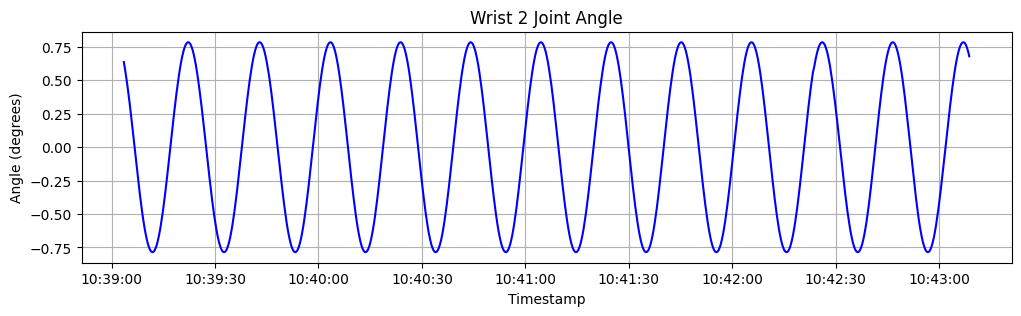

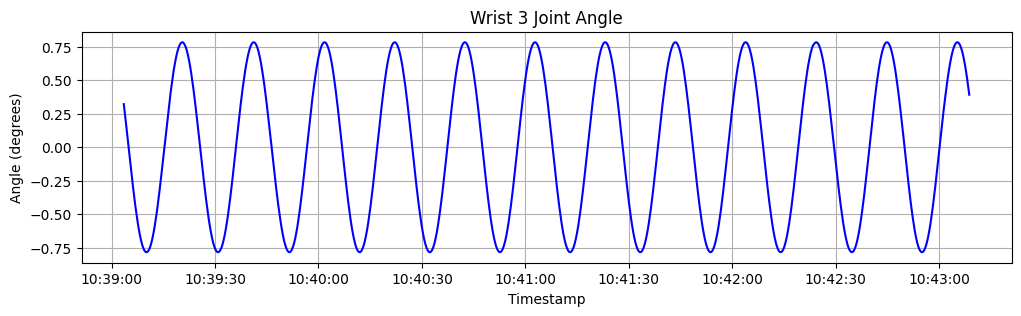

In [22]:
def plot_joint_angle(joint_data, joint_column, title):
    plt.figure(figsize=(12, 3))
    plt.plot(joint_data['timestamp'], joint_data[joint_column], color='b', label=joint_column)
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Angle (degrees)')
    plt.grid(True)
    plt.show()
    
plot_joint_angle(joint_data, "shoulder_pan_joint_angle", "Shoulder Pan Joint Angle")
plot_joint_angle(joint_data, "shoulder_lift_joint_angle", "Shoulder Lift Joint Angle")
plot_joint_angle(joint_data, "elbow_joint_angle", "Elbow Joint Angle")
plot_joint_angle(joint_data, "wrist_1_joint_angle", "Wrist 1 Joint Angle")
plot_joint_angle(joint_data, "wrist_2_joint_angle", "Wrist 2 Joint Angle")
plot_joint_angle(joint_data, "wrist_3_joint_angle", "Wrist 3 Joint Angle")


# Modelling

## linear regression

In [23]:


def train_and_evaluate_time_series_regression(joint_data, joint_column, n_steps=15, split_ratio=0.8):
    """
    Train a Linear Regression model to predict the next value of a specified joint angle
    based on the previous n_steps values, and evaluate the model's performance.

    Parameters:
    - joint_data (pd.DataFrame): DataFrame containing joint angle data.
    - joint_column (str): The column name of the joint angle to predict.
    - n_steps (int): The number of past values to use for predicting the next value.
    - split_ratio (float): The proportion of data to use for training (default is 0.8).

    Returns:
    - model performance
    """
    
    # Prepare the data by creating sequences of length n_steps
    X, y = [], []
    for i in range(n_steps, len(joint_data)):
        X.append(joint_data[joint_column].iloc[i-n_steps:i].values)
        y.append(joint_data[joint_column].iloc[i])
    
    X, y = np.array(X), np.array(y)
    
    # Split the data into training and testing sets
    split_index = int(len(X) * split_ratio)
    X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]
    
    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions and calculate RMSE
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    print(f"Linear Regression RMSE for predicting {joint_column} with {n_steps} steps:", rmse)

train_and_evaluate_time_series_regression(joint_data, "shoulder_pan_joint_angle")
train_and_evaluate_time_series_regression(joint_data, "shoulder_lift_joint_angle")
train_and_evaluate_time_series_regression(joint_data, "elbow_joint_angle")
train_and_evaluate_time_series_regression(joint_data, "wrist_1_joint_angle")
train_and_evaluate_time_series_regression(joint_data, "wrist_2_joint_angle")
train_and_evaluate_time_series_regression(joint_data, "wrist_3_joint_angle")


Linear Regression RMSE for predicting shoulder_pan_joint_angle with 15 steps: 2.4807350853055643e-15
Linear Regression RMSE for predicting shoulder_lift_joint_angle with 15 steps: 2.785326170031833e-15
Linear Regression RMSE for predicting elbow_joint_angle with 15 steps: 3.194439881203369e-15
Linear Regression RMSE for predicting wrist_1_joint_angle with 15 steps: 3.435213786819006e-15
Linear Regression RMSE for predicting wrist_2_joint_angle with 15 steps: 3.230975200363175e-15
Linear Regression RMSE for predicting wrist_3_joint_angle with 15 steps: 3.034273536925237e-15


## Multivariate Linear Regression

In [24]:



def train_and_evaluate_multivariate_regression(joint_data, target_joint, split_ratio=0.8):
    """
    Train a Multivariate Linear Regression model to predict the target joint angle
    based on all other joint angles, and evaluate the model's performance.

    Parameters:
    - joint_data (pd.DataFrame): DataFrame containing joint angles and possibly a timestamp column.
    - target_joint (str): The column name of the joint angle to predict.
    - split_ratio (float): The proportion of data to use for training (default is 0.8).

    Returns:
    - model performance
    """

    # Define the input features (all other joints except the target joint, timestamp, and time columns if they exist)
    X = joint_data.drop(columns=[target_joint, 'timestamp', 'time'], errors='ignore').values
    y = joint_data[target_joint].values

    # Split the data into training and testing sets
    split_index = int(len(X) * split_ratio)
    X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f"Multivariate Linear Regression RMSE for {target_joint}:", rmse)


train_and_evaluate_multivariate_regression(joint_data, "shoulder_pan_joint_angle")
train_and_evaluate_multivariate_regression(joint_data, "shoulder_lift_joint_angle")
train_and_evaluate_multivariate_regression(joint_data, "elbow_joint_angle")
train_and_evaluate_multivariate_regression(joint_data, "wrist_1_joint_angle")
train_and_evaluate_multivariate_regression(joint_data, "wrist_2_joint_angle")
train_and_evaluate_multivariate_regression(joint_data, "wrist_3_joint_angle")


Multivariate Linear Regression RMSE for shoulder_pan_joint_angle: 2.3514482736784228e-15
Multivariate Linear Regression RMSE for shoulder_lift_joint_angle: 1.4321792029584596e-15
Multivariate Linear Regression RMSE for elbow_joint_angle: 3.993233376716676e-15
Multivariate Linear Regression RMSE for wrist_1_joint_angle: 4.844966401820281e-15
Multivariate Linear Regression RMSE for wrist_2_joint_angle: 1.9044776126699078e-15
Multivariate Linear Regression RMSE for wrist_3_joint_angle: 1.8575406884564123e-15


 ## Takeaway : we can perform regression to predict the values for angle or velocity, either using time series data or multivariate data or may combine both